In [85]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle

import pandas as pd
import requests
from io import StringIO as sio
import numpy as np
import baltic as bt
from collections import defaultdict

In [86]:
plt.style.use('plot_style.txt')

In [87]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [88]:
group_l = ['G1', 'G1R1', 'G1R2', 'G1R3', 'G1other', 'G0', 'G0R1', 'G0other']
color_l = ['#832316', '#ca613d', '#e8c555', '#e4b897', '#878b9f', '#3C5488', '#a9b8a2', '#878b9f']

group_map = {
    '1_1_1_1_1_1_1_1': 'G1', '2_2_1_1_2_1_1_1': 'G1R1', '3_2_2_1_2_1_1_2': 'G1R2', '1_1_1_1_2_1_1_1': 'G1R3', '3_5_1_1_2_1_1_1': 'G1other', '3_1_2_1_2_1_1_1': 'G1other', 
    '0_0_0_0_0_0_0_0': 'G0', '4_2_3_0_3_2_0_0': 'G0R1', '0_0_5_0_0_0_0_0': 'G0other', '5_4_4_0_4_0_3_3': 'G0other', '6_3_6_0_5_0_2_4': 'G0other'
}

color_ = dict(zip(group_l, color_l))

In [89]:
genotype = pd.read_csv('genotype.csv', sep='\t', index_col=0)
genotype

,HA,MP,NA,NP,NS,PA,PB1,PB2,Acc,date,group
acc,,,,,,,,,,,
EPI_ISL_402134|2019-12-30,1,1,1,1,1,1,1,1,EPI_ISL_402134,2019-12-30,1_1_1_1_1_1_1_1
EPI_ISL_525439|2020-01-01,1,1,1,1,1,1,1,1,EPI_ISL_525439,2020-01-01,1_1_1_1_1_1_1_1
EPI_ISL_525441|2020-01-02,1,1,1,1,1,1,1,1,EPI_ISL_525441,2020-01-02,1_1_1_1_1_1_1_1
EPI_ISL_525440|2020-01-02,1,1,1,1,1,1,1,1,EPI_ISL_525440,2020-01-02,1_1_1_1_1_1_1_1
EPI_ISL_405813|2020-01-06,1,1,1,1,1,1,1,1,EPI_ISL_405813,2020-01-06,1_1_1_1_1_1_1_1
...,...,...,...,...,...,...,...,...,...,...,...
EPI_ISL_3128526|2021-05-31,0,0,0,0,0,0,0,0,EPI_ISL_3128526,2021-05-31,0_0_0_0_0_0_0_0
EPI_ISL_3128532|2021-06-01,0,0,0,0,0,0,0,0,EPI_ISL_3128532,2021-06-01,0_0_0_0_0_0_0_0
EPI_ISL_3128527|2021-06-02,0,0,0,0,0,0,0,0,EPI_ISL_3128527,2021-06-02,0_0_0_0_0_0_0_0


# Plot tanglegram trees

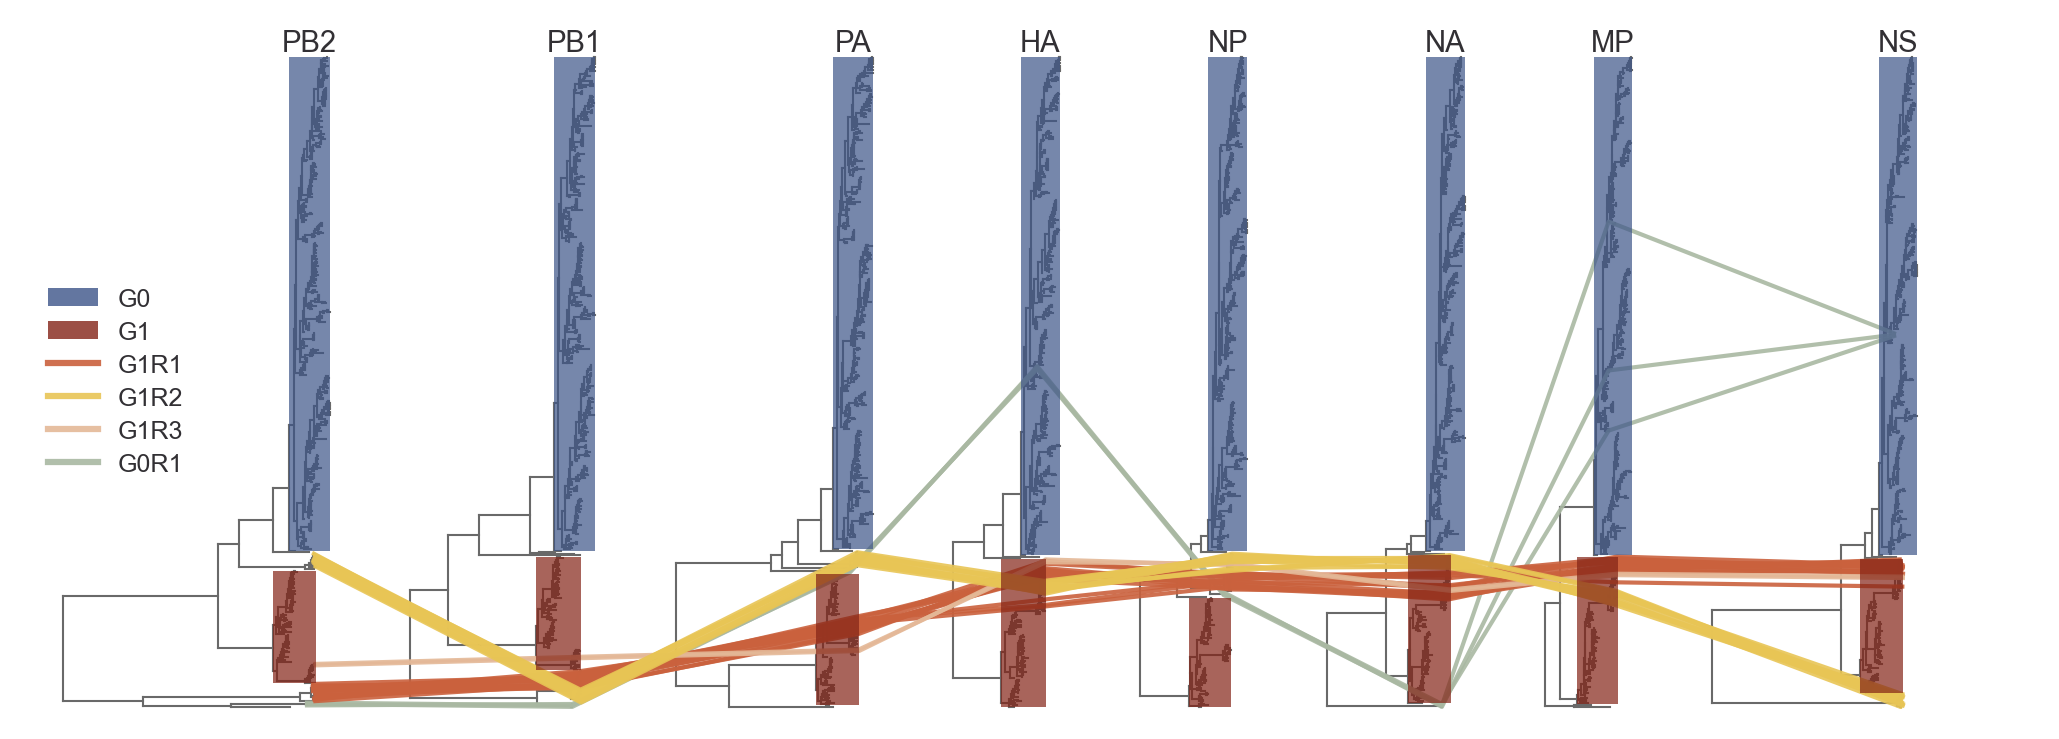

In [91]:
segments = ['PB2', 'PB1', 'PA', 'HA', 'NP', 'NA', 'MP', 'NS']
trees = {}
deltas = {}

skip = 0
cum_height = 0
ySpan = 0
for i, segment in enumerate(segments):
    treeFile=r'data/03_beast_analysis/beast_db1/combined_%s.mcc.tree'%(segment) ## address of example tree
    ll=bt.loadNexus(treeFile,tip_regex='_([0-9\-]+)$', absoluteTime=False)

    trees[segment] = ll
    deltas[segment] = cum_height

    if i == 0:
        skip = ll.treeHeight * 0.3
        ySpan = ll.ySpan

    cum_height = cum_height + ll.treeHeight + skip


fig = plt.subplots(figsize=(6.75, 2.35),facecolor='w',dpi=300,constrained_layout=True)
ax = plt.subplot(1,1,1)

for i, segment in enumerate(segments):
    delta = deltas[segment]
    tree = trees[segment]
    
    name_intr = genotype.query("group == '1_1_1_1_1_1_1_1'").index.to_list()
    hightlight = trees[segment].commonAncestor(list(filter(lambda x: x.branchType=='leaf' and x.name in name_intr, trees[segment].Objects)))
    (lower, upper), left, right = hightlight.yRange, hightlight.height, hightlight.childHeight
    left += deltas[segment]
    right += deltas[segment]
    width = right - left
    height = upper - lower
    rect=Rectangle((left,-upper),width,height,facecolor='#832316',edgecolor='none',lw=1,ls='-',zorder=100, alpha=.7) ## create rectangle
    ax.add_patch(rect) ## add rectangle to plot

    name_intr = genotype.query("group == '0_0_0_0_0_0_0_0'").index.to_list()
    hightlight = trees[segment].commonAncestor(list(filter(lambda x: x.branchType=='leaf' and x.name in name_intr, trees[segment].Objects)))
    (lower, upper), left, right = hightlight.yRange, hightlight.height, hightlight.childHeight
    left += deltas[segment]
    right += deltas[segment]
    width = right - left
    height = upper - lower
    rect=Rectangle((left,-upper),width,height,facecolor='#3C5488',edgecolor='none',lw=1,ls='-',zorder=100, alpha=.7) ## create rectangle
    ax.add_patch(rect) ## add rectangle to plot
    
    ax.text(left+width/2, -lower, segment, ha='center', va='bottom')

    x_attr=lambda k: delta+k.height ## for tree2 we'll offset x coordinates by the height of the tree and invert branches
    y_attr=lambda k: -k.y
    tree.plotTree(ax,x_attr=x_attr, y_attr=y_attr,width=.5,colour='dimgrey') ## plot black tree

    
    
for k in trees['PB2'].getExternal():
    genotype_ = genotype.loc[k.name, 'group']
    
    if genotype_ in ['0_0_0_0_0_0_0_0', '1_1_1_1_1_1_1_1']:
#         branchs = {seg: trees[seg].getBranches(lambda x: x.branchType=='leaf' and x.name==k.name) for seg in segments}
#         xs = [branchs[seg].x + deltas[seg] for seg in segments]
#         ys = [branchs[seg].y for seg in segments]
#         ax.plot(xs, ys, color=color_[group_map[genotype_]], alpha=.2, lw=1)
        continue

    if genotype_ in ['2_2_1_1_2_1_1_1', '3_2_2_1_2_1_1_2', '1_1_1_1_2_1_1_1', '4_2_3_0_3_2_0_0']:
        branchs = {seg: trees[seg].getBranches(lambda x: x.branchType=='leaf' and x.name==k.name) for seg in segments}

        xs = [branchs[seg].x + deltas[seg] for seg in segments]
        ys = [-branchs[seg].y for seg in segments]

        ax.plot(xs, ys, color=color_[group_map[genotype_]], alpha=.9, lw=1)


### add legend
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
handles = []
for group_ in ['0_0_0_0_0_0_0_0', '1_1_1_1_1_1_1_1']:
    handles.append(mpatches.Patch(facecolor=color_[group_map[group_]], label=group_map[group_], alpha=.8, edgecolor='none'))
for group_ in ['2_2_1_1_2_1_1_1', '3_2_2_1_2_1_1_2', '1_1_1_1_2_1_1_1', '4_2_3_0_3_2_0_0']:
    handles.append(Line2D([0], [0], color=color_[group_map[group_]], lw=1.5, label=group_map[group_], alpha=.9))

plt.legend(handles=handles, frameon=False, loc='center left', fontsize=6)

[ax.spines[loc].set_visible(False) for loc in ['top','right','left','bottom']]

ax.tick_params(axis='x',size=0)
ax.tick_params(axis='y',size=0)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_ylim(-ySpan-1,1) ## set y limits
ax.set_xlim(-1,cum_height+1)

# plt.show()
plt.savefig('./results/fig1e.pdf', dpi=300, transparent=False)

# Plot HA tree with group delineating

In [92]:
treeFile = './nextstrain/timetree.tree'
ll=bt.loadNewick(treeFile,absoluteTime=False) ## treeFile here can alternatively be a path to a local file

mst = mst = bt.decimalDate('2021-06-04')
ll.setAbsoluteTime(mst)

In [93]:
metainfo = pd.read_csv('./dataset1_metainfo3.csv', sep='\t')
# metainfo['Isolate_Name'] = metainfo['Isolate_Name'].str.strip().str.replace(' ', '_').str.replace('(', '_').str.replace(')', '_')
metainfo['Isolate_Name'] = metainfo['Isolate_Name'].str.strip().str.replace('[\s\(\)]', '_', regex=True)

In [94]:
metainfo = pd.merge(metainfo, genotype, left_on='Isolate_Id', right_on='Acc')
metainfo = metainfo.set_index('Isolate_Name')
metainfo.head()

,Isolate_Id,Subtype,Host,Collection_Date,Domestic_Status,host,Region,Country,Province,host2,...,MP,NA,NP,NS,PA,PB1,PB2,Acc,date,group
Isolate_Name,,,,,,,,,,,,,,,,,,,,,
A/falcon/England/041976/2020,EPI_ISL_766056,A / H5N8,Falcon,2020-12-14,NaN,falcon,Europe,United Kingdom,Derbyshire,Other,...,0,0,0,0,0,0,0,EPI_ISL_766056,2020-12-14,0_0_0_0_0_0_0_0
A/peregrine_falcon/Denmark/14596-1/2020,EPI_ISL_984690,A / H5N8,Falco peregrinus,2020-11-06,Wild,peregrine falcon,Europe,Denmark,Region Syddanmark,Other,...,0,0,0,0,0,0,0,EPI_ISL_984690,2020-11-06,0_0_0_0_0_0_0_0
A/common_buzzard/Denmark/14600-1/2020,EPI_ISL_984691,A / H5N8,Buteo buteo,2020-11-06,Wild,common buzzard,Europe,Denmark,Region Syddanmark,Other,...,0,0,0,0,0,0,0,EPI_ISL_984691,2020-11-06,0_0_0_0_0_0_0_0
A/black-headed_gull/Denmark/14139-4/2020,EPI_ISL_984680,A / H5N8,Chroicocephalus ridibundus,2020-11-04,Wild,black-headed gull,Europe,Denmark,Region Syddanmark,Seabird,...,0,0,0,0,0,0,0,EPI_ISL_984680,2020-11-04,0_0_0_0_0_0_0_0
A/barnacle_goose/Denmark/14600-2/2020,EPI_ISL_984692,A / H5N8,Branta leucopsis,2020-11-07,Wild,barnacle goose,Europe,Denmark,Region Syddanmark,Waterfowl,...,0,0,0,0,0,0,0,EPI_ISL_984692,2020-11-07,0_0_0_0_0_0_0_0


In [95]:
import json

node_time = json.load(open('./nextstrain/node.json'))['nodes']
node_region = json.load(open('./nextstrain/node2.json'))['nodes']

In [96]:
for node in ll.Objects:
    if node.is_leaf():
        node_name = node.name
    else:
        node_name = node.traits['label']
    stime = node_time[node_name]['numdate']
    sregion = node_region[node_name]['region']
    node.absoluteTime = float(stime)
    node.traits['region'] = sregion

In [97]:
region_l = ['Africa', 'China', 'Europe', 'JapanKorea', 'NorthAmerica', 'SouthAsia', 'WestAsia']
color_seg = ['#832316', '#ca613d', '#e8c555', '#3C5488', '#e4b897', '#a9b8a2', '#878b9f', '#729461']

region_map = dict(zip(region_l, color_seg))

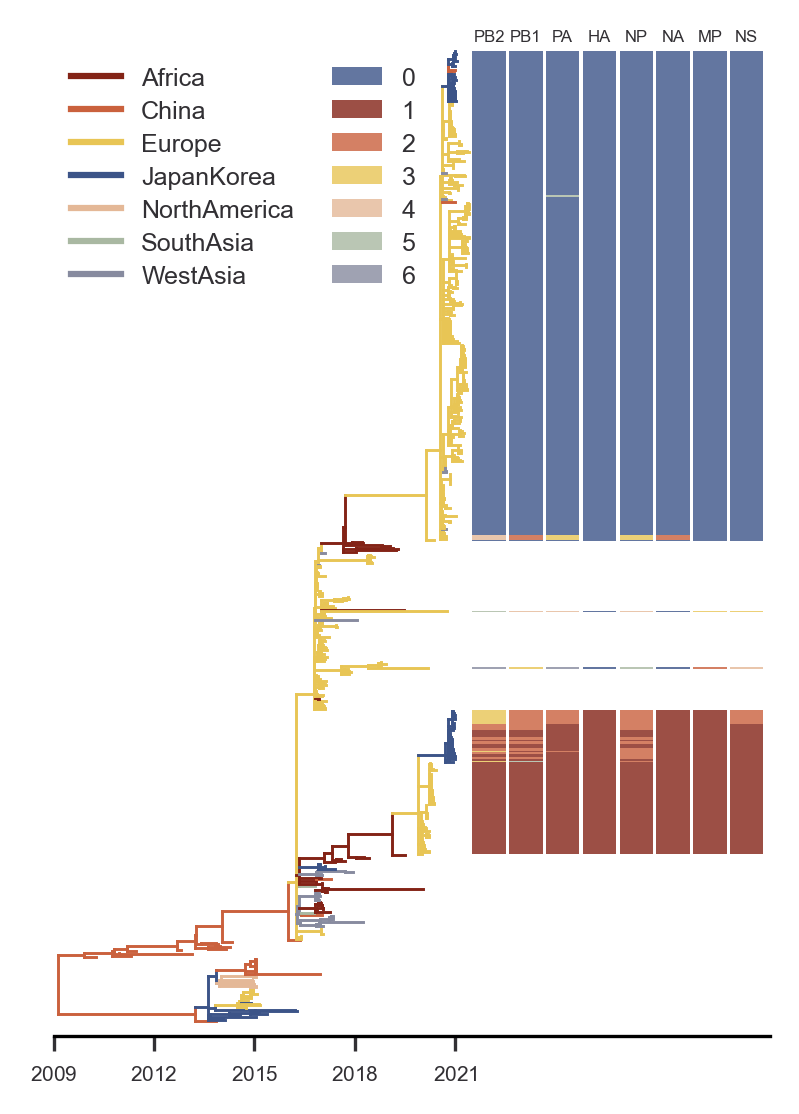

In [99]:
# scale = 10
treeHeight = ll.root.absoluteTime


fig = plt.subplots(figsize=(2.55, 3.6), facecolor='w', dpi=300, constrained_layout=True)

ax = plt.subplot(111)

x_attr=lambda k: k.absoluteTime
y_attr=lambda k: -k.y
c_func = lambda k: region_map[k.traits['region']]
ll.plotTree(ax, width=.7, x_attr=x_attr, y_attr=y_attr, colour=c_func)

for leaf in ll.getExternal():
    if leaf.name in metainfo.index:
        group = metainfo.loc[leaf.name, 'group']
        if not isinstance(group, str):
            group = group.to_list()[0]
        leaf.traits['group'] = group
    else:
        leaf.traits['group'] = None


color_seg = ['#3C5488', '#832316', '#ca613d', '#e8c555', '#e4b897', '#a9b8a2', '#878b9f', '#729461']


w = 1
skip = w / 10
h = 1

for leaf in ll.getExternal():
    group = leaf.traits['group']
    if group:
        y = leaf.y
        seg_group = list(map(int, group.split('_')))

        for s in range(8): ## iterate over segments
            group_i = seg_group[s]
            base=ll.mostRecent + skip ## where reassortment indicator boxes begin
            rect=plt.Rectangle((base+s*(w+skip),-y-h/2),w,h,facecolor=color_seg[group_i], edgecolor=color_seg[group_i], lw=.0, alpha=.8)
            ax.add_patch(rect) ## add rectangle to plot


for i, seg in enumerate(segments):
    if i % 2 == 0:
        t_y = 10
    else:
        t_y = 10
    ax.text(base+i*(w+skip)+w/2, t_y, seg, fontsize=4, horizontalalignment='center', verticalalignment='center', rotation=0)

ax.set_xlim(ll.root.absoluteTime, ll.mostRecent+w*9)
ax.set_xticks(range(2009, 2023, 3))
ax.tick_params(axis='x', labelsize=5)

ax.set_ylim(-10-ll.ySpan, 1) ## set y limits
ax.set_yticks([])
ax.set_yticklabels([])

[ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['bottom']]

# ax.grid(axis='x', ls='--', lw=0.3)

import matplotlib.patches as mpatches
handles = []
for k, v in region_map.items():
    handles.append(Line2D([0], [0], color=v, lw=1.5, label=k, alpha=1))
for i in range(7):
    handles.append(mpatches.Patch(facecolor=color_seg[i], label=i, alpha=.8, edgecolor='none'))

plt.legend(handles=handles, frameon=False, loc='upper left', fontsize=6, title_fontsize=6, ncol=2)


# plt.show()

plt.savefig('./results/fig1a.pdf', dpi=300, transparent=False)

# calculate pairwise distance

In [113]:
from Bio import SeqIO
import itertools
from glob import glob
from multiprocessing import Pool
from tqdm import tqdm
import seaborn as sns

In [95]:
def cal_p_distance(seq1, seq2):
    count_gap = 0
    count_mis = 0
    for i, j in zip(seq1, seq2):
        if i == '-' or j == '-':
            count_gap += 1
        elif i != j:
            count_mis += 1
    return count_mis / (len(seq1) - count_gap)


def cal_within_group_mean_dist(idx, seq_set):
    if len(seq_set) == 1:
        return idx, idx, 0
    combs = list(itertools.combinations(seq_set, 2))
    with Pool(10) as p:
        dist = p.starmap(cal_p_distance, combs)
    n = len(combs)
    mean_dist = sum(dist) / n
    return idx, idx, mean_dist


def cal_between_group_mean_dist(idx1, idx2, seq_set1, seq_set2):
    combs = list(itertools.product(seq_set1, seq_set2))
    with Pool(10) as p:
        dist = p.starmap(cal_p_distance, combs)
    n = len(combs)
    mean_dist = sum(dist) / n
    return idx1, idx2, mean_dist

In [91]:
seq_by_seg = {}
for seg in segments:
    seq_path = './data/02_align_unified/db1_seq_by_acc_%s.fasta' % seg
    seqs_dict = SeqIO.to_dict(SeqIO.parse(seq_path, 'fasta', ), key_function=lambda x: x.id.split('|')[0])
    seq_by_seg[seg] = seqs_dict


In [107]:
df_mdist = pd.DataFrame(columns=['seg', 'group1', 'group2', 'mdist'])

for seg in segments:
    seq_dict = seq_by_seg[seg]
    t = metainfo[['Acc', seg]].groupby(seg).apply(lambda x: x['Acc'].to_list())

    for group_i, acc_set in t.iteritems():
        seq_set = [str(seq_dict[acc].seq) for acc in acc_set]
        sgroup, egroup, mdist = cal_within_group_mean_dist(group_i, seq_set)
#         print(seg, sgroup, egroup, mdist)
        df_mdist = df_mdist.append({'seg': seg, 'group1': sgroup, 'group2': egroup, 'mdist': mdist}, ignore_index=True)

    for a, b in list(itertools.combinations(t.index.to_list(), 2)):
        seq_set1 = [str(seq_dict[acc].seq) for acc in t[a]]
        seq_set2 = [str(seq_dict[acc].seq) for acc in t[b]]
        sgroup, egroup, mdist = cal_between_group_mean_dist(a, b, seq_set1, seq_set2)
#         print(seg, sgroup, egroup, mdist)
        df_mdist = df_mdist.append({'seg': seg, 'group1': sgroup, 'group2': egroup, 'mdist': mdist}, ignore_index=True)

In [111]:
df_mdist['type'] = df_mdist.apply(lambda x: 'within' if x['group1'] == x['group2'] else 'between', axis=1)

In [116]:
df_mdist.to_csv('pairwise_sequence_identity.csv', sep='\t', index=False)

In [254]:
df_mdist.query('type == "between"')['mdist'].max(), df_mdist.query('type == "between"')['mdist'].min()

(0.29154521911338943, 0.011019283746556474)

In [253]:
df_mdist.query('type == "within"')['mdist'].max(), df_mdist.query('type == "within"')['mdist'].min()

(0.008935731606599445, 0.0)

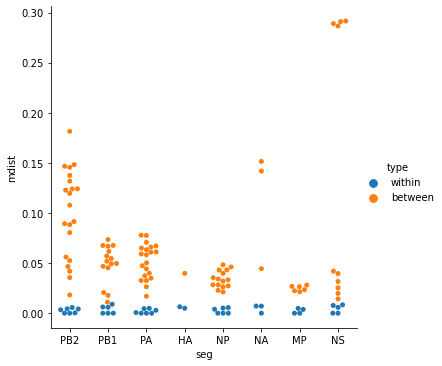

In [122]:
sns.catplot(x="seg", y="mdist", hue="type", kind="swarm", data=df_mdist)

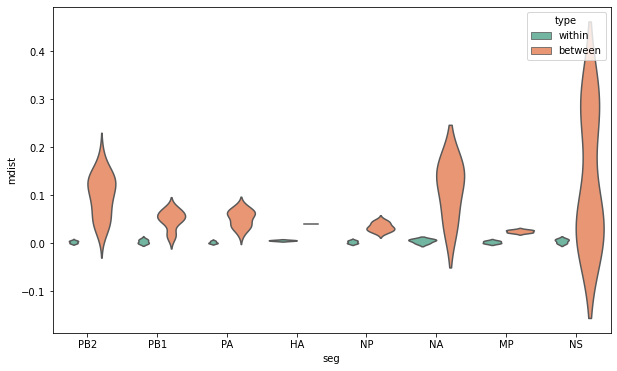

In [156]:
fig, ax =plt.subplots(1, 1, figsize=(10,6))

sns.violinplot(x="seg", y="mdist", hue="type", ax=ax, scale='count', inner=None, split=False, palette="Set2", data=df_mdist)

plt.show()

## Wilcoxon rank-sum test tests 

In [175]:
from scipy import stats

In [178]:
f = lambda x: '<0.001' if pvalue < 0.001 else pvalue

for seg in segments:
    s1 = df_mdist.query("seg == @seg and type == 'within'")['mdist']
    s2 = df_mdist.query("seg == @seg and type == 'between'")['mdist']
    statistic, pvalue = stats.ranksums(s1, s2)

    print(seg, statistic, f(pvalue))

PB2 -3.899602101718089 <0.001
PB1 -3.5032452487268535 <0.001
PA -3.899602101718089 <0.001
HA -1.224744871391589 0.22067136191984693
NP -3.5032452487268535 <0.001
NA -1.9639610121239315 0.049534613435626706
MP -2.5584085962673253 0.010515245935858907
NS -3.0618621784789726 0.002199647061113056


In [188]:
genotype

,HA,MP,NA,NP,NS,PA,PB1,PB2,Acc,date,group
acc,,,,,,,,,,,
EPI_ISL_402134|2019-12-30,1,1,1,1,1,1,1,1,EPI_ISL_402134,2019-12-30,1_1_1_1_1_1_1_1
EPI_ISL_525439|2020-01-01,1,1,1,1,1,1,1,1,EPI_ISL_525439,2020-01-01,1_1_1_1_1_1_1_1
EPI_ISL_525441|2020-01-02,1,1,1,1,1,1,1,1,EPI_ISL_525441,2020-01-02,1_1_1_1_1_1_1_1
EPI_ISL_525440|2020-01-02,1,1,1,1,1,1,1,1,EPI_ISL_525440,2020-01-02,1_1_1_1_1_1_1_1
EPI_ISL_405813|2020-01-06,1,1,1,1,1,1,1,1,EPI_ISL_405813,2020-01-06,1_1_1_1_1_1_1_1
...,...,...,...,...,...,...,...,...,...,...,...
EPI_ISL_3128526|2021-05-31,0,0,0,0,0,0,0,0,EPI_ISL_3128526,2021-05-31,0_0_0_0_0_0_0_0
EPI_ISL_3128532|2021-06-01,0,0,0,0,0,0,0,0,EPI_ISL_3128532,2021-06-01,0_0_0_0_0_0_0_0
EPI_ISL_3128527|2021-06-02,0,0,0,0,0,0,0,0,EPI_ISL_3128527,2021-06-02,0_0_0_0_0_0_0_0


In [194]:
acc_l = genotype.query('group == "0_0_0_0_0_0_0_0"')['Acc'].to_list()

In [202]:
seq_ext_for_G0 = list(SeqIO.parse('./data/09_ext_group/ext_0_0_0_0_0_0_0_0_HA.fasta', 'fasta'))

In [206]:
seq_inG0 = [seq for seq in seq_ext_for_G0 if seq.id in acc_l]
seq_notinG0 = [seq for seq in seq_ext_for_G0 if seq.id not in acc_l]

In [217]:
acc_notinG0 = [seq.id for seq in seq_notinG0]
acc_inG0 = [seq.id for seq in seq_inG0]

In [229]:
df = pd.read_csv('./dataset2_metainfo.csv', sep='\t')
df2 = df.query("Isolate_Id in @acc_notinG0")[['Isolate_Id', 'Isolate_Name', 'Subtype', 'Country', 'Host', 'Collection_Date']].sort_values('Collection_Date')
s1 = df2.query('Country=="Egypt"')['Isolate_Id'].to_list()

In [230]:
s2 = df.query("Isolate_Id in @acc_inG0")[['Isolate_Id', 'Isolate_Name', 'Subtype', 'Country', 'Host', 'Collection_Date']].sort_values('Collection_Date').head(39).Isolate_Id.to_list()

In [236]:
ss = list(SeqIO.parse('./data/09_ext_group/ext_0_0_0_0_0_0_0_0_HA.fasta', 'fasta'))

In [240]:
ss1 = [str(s.seq) for s in ss if s.id in s1]
ss2 = [str(s.seq) for s in ss if s.id in s2]

In [244]:
dist_s = [cal_p_distance(i, j) for i in ss1 for j in ss2]

In [245]:
max(dist_s), min(dist_s)

(0.023022432113341203, 0.01584507042253521)

In [318]:
genotype

,HA,MP,NA,NP,NS,PA,PB1,PB2,Acc,date,group
acc,,,,,,,,,,,
EPI_ISL_402134|2019-12-30,1,1,1,1,1,1,1,1,EPI_ISL_402134,2019-12-30,1_1_1_1_1_1_1_1
EPI_ISL_525439|2020-01-01,1,1,1,1,1,1,1,1,EPI_ISL_525439,2020-01-01,1_1_1_1_1_1_1_1
EPI_ISL_525441|2020-01-02,1,1,1,1,1,1,1,1,EPI_ISL_525441,2020-01-02,1_1_1_1_1_1_1_1
EPI_ISL_525440|2020-01-02,1,1,1,1,1,1,1,1,EPI_ISL_525440,2020-01-02,1_1_1_1_1_1_1_1
EPI_ISL_405813|2020-01-06,1,1,1,1,1,1,1,1,EPI_ISL_405813,2020-01-06,1_1_1_1_1_1_1_1
...,...,...,...,...,...,...,...,...,...,...,...
EPI_ISL_3128526|2021-05-31,0,0,0,0,0,0,0,0,EPI_ISL_3128526,2021-05-31,0_0_0_0_0_0_0_0
EPI_ISL_3128532|2021-06-01,0,0,0,0,0,0,0,0,EPI_ISL_3128532,2021-06-01,0_0_0_0_0_0_0_0
EPI_ISL_3128527|2021-06-02,0,0,0,0,0,0,0,0,EPI_ISL_3128527,2021-06-02,0_0_0_0_0_0_0_0


# Test TreeKnit

In [342]:
acc_ = ['EPI_ISL_684037', 'EPI_ISL_985190', 'EPI_ISL_985189', 'EPI_ISL_503968', 'EPI_ISL_644125', 'EPI_ISL_623074']

In [343]:
work_dir = '/home/zeng/Desktop/test/'

In [461]:
t1 = bt.loadNewick(work_dir+'PB1.nwk')
t2 = bt.loadNewick(work_dir+'NP.nwk')

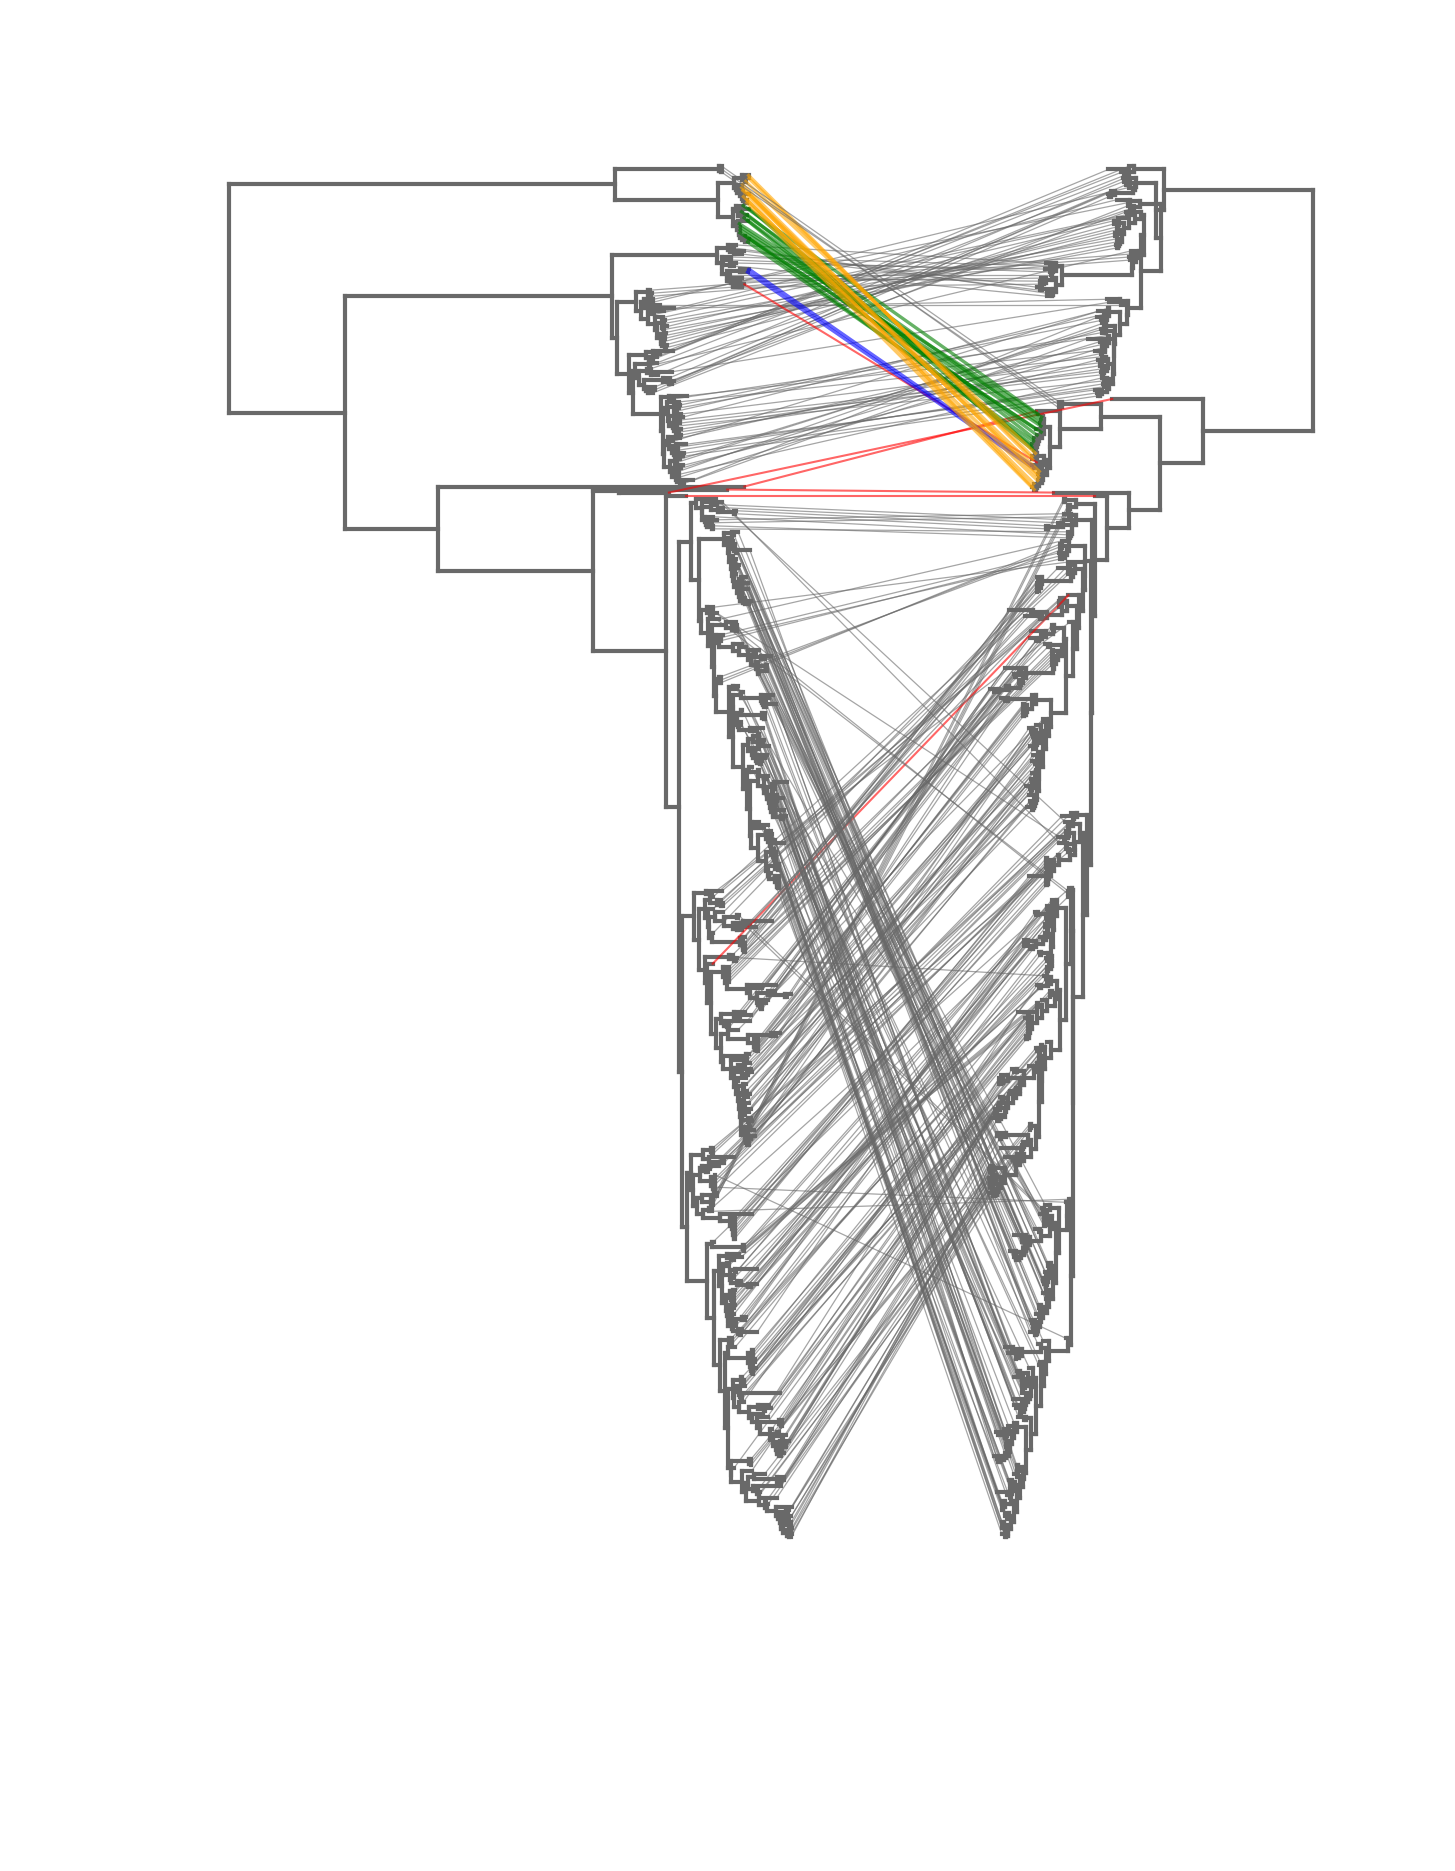

In [462]:
fig = plt.subplots(figsize=(6, 8),facecolor='w',dpi=300)

gs = GridSpec(1, 1,hspace=0.0,wspace=0.0)
ax = plt.subplot(gs[0])

cmap=mpl.cm.cividis
skip=t1.treeHeight*0.35

x_attr=lambda k: k.height ## for tree2 we'll offset x coordinates by the height of the tree and invert branches
y_attr=lambda k: k.y
t1.plotTree(ax,x_attr=x_attr, y_attr=y_attr,width=1,colour='dimgrey') ## plot black tree

x_attr=lambda k: t1.treeHeight + skip + t2.treeHeight -k.height ## for tree2 we'll offset x coordinates by the height of the tree and invert branches
y_attr=lambda k: k.y
t2.plotTree(ax,x_attr=x_attr, y_attr=y_attr,width=1,colour='dimgrey') ## plot black tree

for k in t1.getExternal():
    genotype_ = genotype.loc[k.name, 'group']
    
    branchs = t2.getBranches(lambda x: x.branchType=='leaf' and x.name==k.name)

    xs = t1.treeHeight + skip + t2.treeHeight - branchs.height
    ys = branchs.y
    
    if k.name.split('|')[0] in acc_:
        ax.plot([k.x, xs], [k.y, ys], alpha=.6, lw=0.5, color='red')
        continue

    if genotype.loc[k.name, 'group'] == '1_1_1_1_2_1_1_1':
        ax.plot([k.x, xs], [k.y, ys], alpha=.6, lw=0.8, color='blue')
        continue

    if genotype.loc[k.name, 'group'] == '2_2_1_1_2_1_1_1':
        ax.plot([k.x, xs], [k.y, ys], alpha=.6, lw=0.8, color='green')
        continue

    if genotype.loc[k.name, 'group'] == '3_2_2_1_2_1_1_2':
        ax.plot([k.x, xs], [k.y, ys], alpha=.6, lw=0.8, color='orange')
        continue
        
    ax.plot([k.x, xs], [k.y, ys], alpha=.6, lw=.3, color='dimgrey')
    
[ax.spines[loc].set_visible(False) for loc in ['top','right','left','bottom']]

ax.tick_params(axis='x',size=0)
ax.tick_params(axis='y',size=0)
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.show()

In [ ]:
segments = ['PB2', 'PB1', 'PA', 'HA', 'NP', 'NA', 'MP', 'NS']
trees = {}
deltas = {}
# tip_positions = defaultdict(dict)

skip = 0
cum_height = 0
ySpan = 0
for i, segment in enumerate(segments):
    treeFile=r'data/03_beast_analysis/beast_db1/combined_%s.mcc.tree'%(segment) ## address of example tree
    ll=bt.loadNexus(treeFile,tip_regex='_([0-9\-]+)$', absoluteTime=False)

    trees[segment] = ll
    deltas[segment] = cum_height

    if i == 0:
        skip = ll.treeHeight * 0.3
        ySpan = ll.ySpan

    cum_height = cum_height + ll.treeHeight + skip


fig = plt.subplots(figsize=(7.08, 2.35),facecolor='w',dpi=300)

gs = GridSpec(1, 1,hspace=0.0,wspace=0.0)
ax = plt.subplot(gs[0])


cmap=mpl.cm.cividis

for i, segment in enumerate(segments):
    delta = deltas[segment]
    tree = trees[segment]
    x_attr=lambda k: delta+k.height ## for tree2 we'll offset x coordinates by the height of the tree and invert branches
    y_attr=lambda k: -k.y
    tree.plotTree(ax,x_attr=x_attr, y_attr=y_attr,width=.5,colour='dimgrey') ## plot black tree
    # tree2.plotPoints(ax,x_attr=x_attr,size=10,colour=ct_func,zorder=100) ## plot circles at tips


    
for k in trees['PB2'].getExternal():
    genotype_ = genotype.loc[k.name, 'group']
    
    if genotype_ in ['0_0_0_0_0_0_0_0', '1_1_1_1_1_1_1_1']:
#         branchs = {seg: trees[seg].getBranches(lambda x: x.branchType=='leaf' and x.name==k.name) for seg in segments}
#         xs = [branchs[seg].x + deltas[seg] for seg in segments]
#         ys = [branchs[seg].y for seg in segments]
#         ax.plot(xs, ys, color=color_[group_map[genotype_]], alpha=.2, lw=1)
        continue

    if genotype_ in ['2_2_1_1_2_1_1_1', '3_2_2_1_2_1_1_2', '1_1_1_1_2_1_1_1', '4_2_3_0_3_2_0_0']:
        branchs = {seg: trees[seg].getBranches(lambda x: x.branchType=='leaf' and x.name==k.name) for seg in segments}

        xs = [branchs[seg].x + deltas[seg] for seg in segments]
        ys = [-branchs[seg].y for seg in segments]

        ax.plot(xs, ys, color=color_[group_map[genotype_]], alpha=.9, lw=.5)





[ax.spines[loc].set_visible(False) for loc in ['top','right','left','bottom']]

ax.tick_params(axis='x',size=0)
ax.tick_params(axis='y',size=0)
ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_ylim(-ySpan-1,1) ## set y limits
ax.set_xlim(-1,cum_height+5)

plt.show()